#### **CCA 上位n%区分によるポートフォリオの作成と、等ポートフォリオとのリターン比較**

In [1]:
from helpers import *

In [2]:
df = pd.read_csv('../../DATAHUB/1577b043-c0fb-46e7-8eb1-cf678acda511.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df

,DATE,TICKER,TOTAL_SALES
0,2014-01-01,1301,21049027
1,2014-02-01,1301,24881772
2,2014-03-01,1301,33947832
3,2014-04-01,1301,24015019
4,2014-05-01,1301,24083923
...,...,...,...
38594,2025-02-01,unlisted,18841308547
38595,2025-03-01,unlisted,20553120960
38596,2025-04-01,unlisted,19575731762
38597,2025-05-01,unlisted,20236714694


In [3]:
# データ読み込みとフィルタリング
df_filtered = filter_data_cca(df)
df_filtered

original data: 38599
filtered data: 35164


,DATE,TICKER,TOTAL_SALES
0,2014-01-01,1301,21049027
1,2014-02-01,1301,24881772
2,2014-03-01,1301,33947832
3,2014-04-01,1301,24015019
4,2014-05-01,1301,24083923
...,...,...,...
35159,2014-11-01,9987,149
35160,2014-12-01,9987,2524
35161,2015-01-01,9987,2824
35162,2015-02-01,9987,1322


In [4]:
df_monthly = daily_to_monthly(df_filtered, 'TOTAL_SALES')
df_monthly

original data: 35164
monthly data: 34918


,MONTH,TICKER,TOTAL_SALES
0,2014-01,1301,21049027
1,2014-01,1332,166339746
2,2014-01,1333,186553299
3,2014-01,1352,877436
4,2014-01,1379,142479143
...,...,...,...
34913,2025-05,9260,1683132
34914,2025-05,9274,295897
34915,2025-05,9305,24617614
34916,2025-05,9852,4450302


In [5]:
df_yoy = calculate_yoy(df_monthly, 'TOTAL_SALES')
df_yoy

original data: 34918
yoy data: 31559


,MONTH,TICKER,TOTAL_SALES,YOY
3119,2015-01,1301,25254608,1.199799
3120,2015-01,1332,173103682,1.040663
3121,2015-01,1333,188857371,1.012351
3122,2015-01,1352,1636704,1.865326
3123,2015-01,1379,125180895,0.878591
...,...,...,...,...
34913,2025-05,9260,1683132,1.403733
34914,2025-05,9274,295897,0.845036
34915,2025-05,9305,24617614,1.299693
34916,2025-05,9852,4450302,1.003495


In [6]:
# price dataの読み込み
price_data = pd.read_csv('../../DATAHUB/Price_Data/price_data_for_pos.csv')
price_data

,DATE,TICKER,PRICE,DIVIDENDS,MONTHLY_RETURN
0,2001-01,1301,935.276245,0.0,NaN
1,2001-02,1301,1021.507446,0.0,0.092199
2,2001-03,1301,981.708252,30.0,-0.009593
3,2001-04,1301,1122.555542,0.0,0.143472
4,2001-05,1301,987.307800,0.0,-0.120482
...,...,...,...,...,...
70831,2025-01,9987,4802.027832,0.0,0.023855
70832,2025-02,9987,4711.927734,0.0,-0.018763
70833,2025-03,9987,4891.137207,50.0,0.048645
70834,2025-04,9987,5176.000000,0.0,0.058241


In [7]:
# percentiles = [10, 25, 40, 100]

multiple_portfolios = create_multiple_portfolios(df_yoy, price_data, percentiles=[5, 55, 100])
multiple_portfolios

上位5%のポートフォリオを作成中...
ポートフォリオ銘柄数: 13
ポートフォリオに含まれた銘柄: ['2230' '2586' '2692' '2700' '2815' '2907' '3405' '3417' '3569' '4151'
 '4212' '4547' '4558']
上位55%のポートフォリオを作成中...
ポートフォリオ銘柄数: 137
ポートフォリオに含まれた銘柄: ['1380' '1384' '2001' '2002' '2003' '2009' '2053' '2058' '2060' '2108'
 '2109' '2114' '2117' '2201' '2204' '2206' '2207' '2208' '2209' '2211'
 '2212' '2216' '2218' '2221' '2226' '2229' '2230' '2266' '2269' '2281'
 '2288' '2294' '2502' '2503' '2531' '2579' '2586' '2587' '2593' '2597'
 '2607' '2608' '2612' '2692' '2700' '2733' '2750' '2801' '2802' '2804'
 '2805' '2806' '2810' '2813' '2815' '2816' '2818' '2819' '2820' '2830'
 '2872' '2875' '2877' '2882' '2884' '2894' '2897' '2907' '2914' '2915'
 '2919' '2922' '2923' '2927' '3004' '3110' '3405' '3417' '3569' '3863'
 '3864' '3865' '3880' '4023' '4045' '4097' '4118' '4151' '4188' '4212'
 '4218' '4221' '4463' '4502' '4524' '4527' '4530' '4534' '4540' '4547'
 '4558' '4568' '4569' '4631' '4917' '4919' '4921' '4927' '4951' '4956'
 '4999' '5110' '5142'

,top_5p,top_55p,top_100p
MONTH,,,
2015-01,0.030855,0.031132,0.028316
2015-02,0.040640,0.032331,0.034627
2015-03,0.019022,0.025852,0.025405
2015-04,-0.006128,0.025672,0.023457
2015-05,0.024770,0.036731,0.025897
...,...,...,...
2025-01,0.059144,-0.003082,-0.002950
2025-02,-0.038142,-0.011244,-0.010026
2025-03,0.073557,0.028603,0.022832


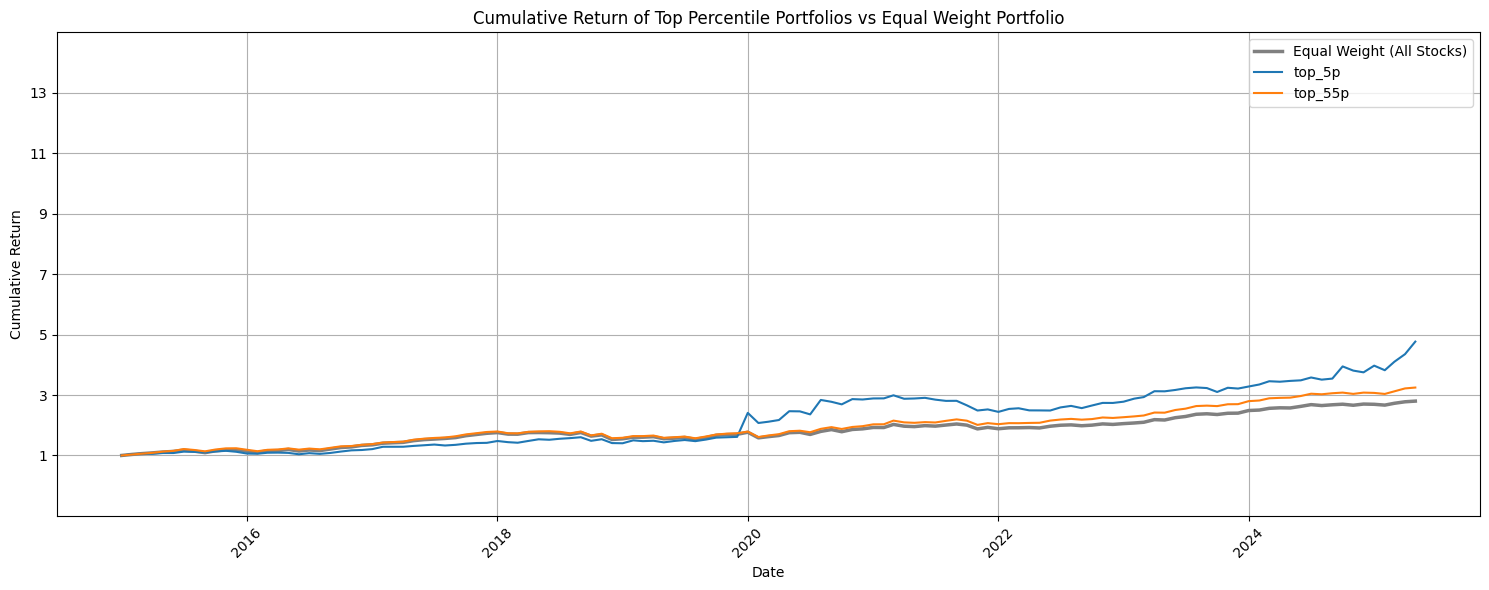

In [8]:
# set date index
multiple_portfolios.index = pd.to_datetime(multiple_portfolios.index)

# 可視化
plot_portfolio_returns(multiple_portfolios)

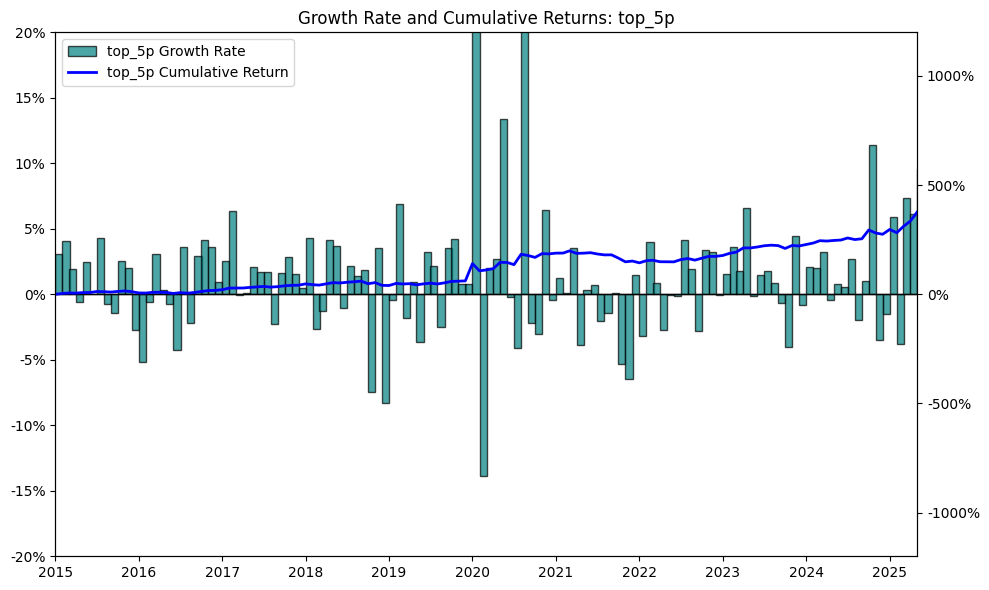

In [9]:
plot_growth_rate(multiple_portfolios, 'top_5p')

In [10]:
# パフォーマンス指標計算
print("パフォーマンス指標を計算中...")
performance_metrics = calculate_performance_metrics(multiple_portfolios)

print("\n=== パフォーマンス指標 ===")
print(performance_metrics.round(2))


パフォーマンス指標を計算中...

=== パフォーマンス指標 ===
          Total Return (%)  Annual Return (%)  Monthly Return (%)  \
top_5p              391.41              16.51                1.43   
top_55p             234.78              12.30                1.01   
top_100p            187.72              10.68                0.89   

          Annual Volatility (%)  Monthly Volatility (%)  Sharpe Ratio  \
top_5p                    20.44                    5.90          0.81   
top_55p                    9.80                    2.83          1.25   
top_100p                   9.88                    2.85          1.08   

          Max Drawdown (%)  Win Rate (%)  
top_5p              -18.34          63.2  
top_55p             -13.00          73.6  
top_100p            -13.13          71.2  


In [11]:
# 月次統計計算
print("\n=== 月次リターンの詳細統計 ===")
monthly_stats = calculate_monthly_statistics(multiple_portfolios)
print(monthly_stats.round(2))



=== 月次リターンの詳細統計 ===
          月次平均リターン (%)  月次ボラティリティ (%)  最小月次リターン (%)  最大月次リターン (%)  中央値 (%)
top_5p            1.43           5.90        -13.87         49.13     0.99
top_55p           1.01           2.83        -10.16          6.31     1.27
top_100p          0.89           2.85        -10.50          5.95     1.34


In [12]:
# 最終累積リターン計算
print("\n=== 最終累積リターン ===")
final_returns = calculate_final_returns(multiple_portfolios)
print(final_returns.to_string(index=False))



=== 最終累積リターン ===
Portfolio  Final Return
   top_5p          4.91
  top_55p          3.35
 top_100p          2.88


In [13]:
# 分析結果サマリー
generate_analysis_summary(multiple_portfolios, df_yoy, performance_metrics)


=== 分析結果サマリー ===
分析期間: 2015-01-01 00:00:00 から 2025-05-01 00:00:00
対象銘柄数: 275
分析したポートフォリオ: ['top_5p', 'top_55p', 'top_100p']

最高パフォーマンス: top_5p (391.41%)
最低パフォーマンス: top_100p (187.72%)

最高シャープレシオ: top_55p (1.25)
最低最大ドローダウン: top_5p (-18.34%)

=== パーセンタイルポートフォリオ間の比較 ===
最高パーセンタイル: top_5p (391.41%)
最低パーセンタイル: top_100p (187.72%)
